# Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

In [2]:
from vbranch.utils.plot import *

Using TensorFlow backend.


In [3]:
with open('results/bagging-3/mnist-fcn.json', 'r') as f:
    results = json.load(f)

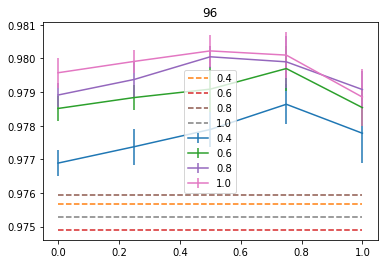

In [16]:
plot_line(results, 4, p1=[0.4, 0.6, 0.8, 1.0], p2=96)

# Figures

In [66]:
p1_list = [0.4, 0.6, 0.8, 1.0]
p2_list = [32, 64, 96, 128]
shared_frac = [0, 0.25, 0.5, 0.75, 1]
branches = 4
n_trials = 8
linestyles = ['--', '-.', ':', '-']

In [67]:
def plot(ax, p2):
    baseline_acc = []
    for i, p in enumerate(p1_list):
        baseline_acc.append(results['baseline'][str(p)][str(p2)][0])
        vbranch_acc = []
        vbranch_std = []

        for s in shared_frac:
            acc, std = results['vbranch'][str(p)][str(p2)][str(branches)][str(s)]
            vbranch_acc.append(acc)
            vbranch_std.append(std)

        error = np.array(vbranch_std) / np.sqrt(n_trials)
        ax.errorbar(shared_frac, vbranch_acc, error*2, 
                    label=str(p), linestyle=linestyles[i])

    ax.plot(shared_frac, [np.mean(baseline_acc)]*len(shared_frac),
         label='baseline', linestyle='-', linewidth=4)
    
    plt.title(f'Batch={p2}')
    plt.xlabel('Shared Fraction')
    plt.ylabel('Validation Accuracy')
    
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11),
              fancybox=True, shadow=True, ncol=5)

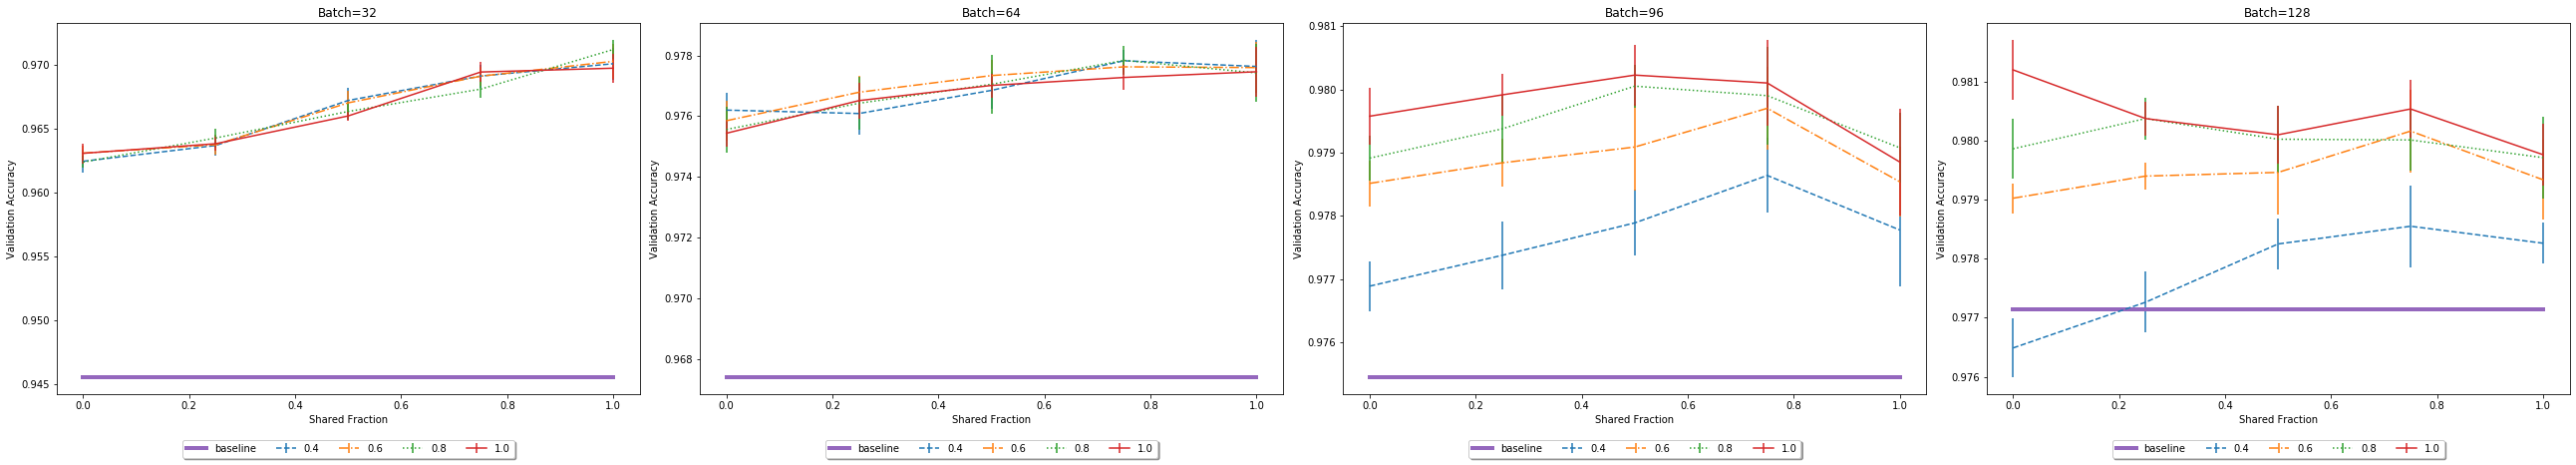

In [68]:
plt.figure(figsize=(36, 6))
for i, p2 in enumerate(p2_list):
    ax = plt.subplot(1, len(p2_list), i+1)
    plot(ax, p2)
plt.tight_layout()
plt.savefig(f'figs/paper/mnist-fcn-{branches}')
plt.show()